In [2]:
!pip install --upgrade bottleneck


   ---------------------------------------- 0.0/110.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/110.1 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.1 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.1 kB ? eta -:--:--
   ---------- ---------------------------- 30.7/110.1 kB 262.6 kB/s eta 0:00:01
   -------------- ------------------------ 41.0/110.1 kB 217.9 kB/s eta 0:00:01
   --------------------- ----------------- 61.4/110.1 kB 297.7 kB/s eta 0:00:01
   ----------------------------------- -- 102.4/110.1 kB 420.8 kB/s eta 0:00:01
   -------------------------------------- 110.1/110.1 kB 375.5 kB/s eta 0:00:00
  Attempting uninstall: bottleneck
    Found existing installation: Bottleneck 1.3.5
    Uninstalling Bottleneck-1.3.5:
      Successfully uninstalled Bottleneck-1.3.5


In [3]:
# Verify the installation
import bottleneck as bn
print(f"Installed bottleneck version: {bn.__version__}")

Installed bottleneck version: 1.3.5


In [27]:
import pandas as pd  # Pandas is a library for data manipulation and analysis.
import re  # re is a library for working with regular expressions.
import nltk  # nltk is the Natural Language Toolkit, used for text processing.
from bs4 import BeautifulSoup  # BeautifulSoup is used to parse HTML and XML documents.
from nltk.corpus import stopwords  # stopwords is a collection of common words to remove from text.
from nltk.tokenize import word_tokenize  # word_tokenize splits text into individual words (tokens).
from nltk.stem import WordNetLemmatizer  # WordNetLemmatizer reduces words to their base or root form.


In [28]:
# Ensure necessary NLTK resources are downloaded
nltk.download('punkt')  # Download the Punkt tokenizer models, necessary for word_tokenize.
nltk.download('stopwords')  # Download the list of stopwords.
nltk.download('wordnet')  # Download the WordNet lexical database, used for lemmatization.(
#Lemmatization is the process of reducing words to their base or root form, ensuring they are valid dictionary words.  running->run)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kamra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kamra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kamra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
# Helper function for text preprocessing
def clean_text(text):
    # Remove HTML tags using BeautifulSoup
    text = BeautifulSoup(text, "html.parser").get_text()
    # Remove non-alphabetic characters using regular expressions
    text = re.sub("[^a-zA-Z]", " ", text)
    # Convert all letters to lowercase
    text = text.lower()
    # Split the text into individual words (tokens)
    words = word_tokenize(text)
    # Create a set of English stopwords
    stop_words = set(stopwords.words("english"))
    # Remove stopwords from the list of words
    words = [w for w in words if not w in stop_words]
    # Create a lemmatizer object
    lemmatizer = WordNetLemmatizer()
    # Lemmatize each word in the list
    words = [lemmatizer.lemmatize(w) for w in words]
    # Join the words back into a single string
    return " ".join(words)

In [31]:
# Load the dataset
file_path = 'imdb_movies_modified_version.csv'  # Path to the CSV file
df = pd.read_csv(file_path)  # Read the CSV file into a DataFrame
df.head()

,Title,Year,Genre,Rating,Description,Director,Votes,Gross
0,The Shawshank Redemption,(1994),Drama,9.3,"Over the course of several years, two convicts...",Frank Darabont,2741365,$28.34M
1,Evil Dead,(2013),Horror,6.5,"Five friends head to a remote cabin, where the...",Fede Alvarez,185688,$54.24M
2,Bullet Train,(2022),"Action, Comedy, Thriller",7.3,Five assassins aboard a swiftly-moving bullet ...,David Leitch,355686,$103.37M
3,The Suicide Squad,(2021),"Action, Adventure, Comedy",7.2,"Supervillains Harley Quinn, Bloodsport, Peacem...",James Gunn,371316,$55.82M
4,65,(2023),"Action, Adventure, Drama",5.4,An astronaut crash lands on a mysterious plane...,Scott Beck,42928,0


In [32]:
# Select relevant columns
df = df[['Title', 'Genre', 'Description']]

In [33]:
# Preprocess the descriptions
df['Description'] = df['Description'].apply(clean_text)

C:\Users\kamra\AppData\Local\Temp\ipykernel_9876\173627038.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


In [34]:
df.shape

(21120, 3)

In [35]:
# Ensure the dataset has exactly 20,000 rows (replicate rows if necessary)
# This loop will continue to run as long as the DataFrame has fewer than 20,000 rows.
while len(df) < 20000:
    # Concatenate the DataFrame with itself to double the number of rows.
    # This is done to increase the number of rows in the DataFrame quickly.
    df = pd.concat([df, df])

In [38]:
df = df.head(20000)  # Ensure exactly 20,000 rows

In [15]:
df.head(100)

,Title,Genre,Description
0,The Shawshank Redemption,Drama,course several year two convict form friendshi...
1,Evil Dead,Horror,five friend head remote cabin discovery book d...
2,Bullet Train,"Action, Comedy, Thriller",five assassin aboard swiftly moving bullet tra...
3,The Suicide Squad,"Action, Adventure, Comedy",supervillains harley quinn bloodsport peacemak...
4,65,"Action, Adventure, Drama",astronaut crash land mysterious planet discove...
...,...,...,...
95,Once Upon a Time in America,"Crime, Drama",former prohibition era jewish gangster return ...
96,White Noise,"Comedy, Drama, Horror",dramatizes contemporary american family attemp...
97,Charlie and the Chocolate Factory,"Adventure, Comedy, Family",young boy win tour magnificent chocolate facto...
98,Toy Story,"Animation, Adventure, Comedy",cowboy doll profoundly threatened jealous new ...


In [39]:
# Save the modified dataset
new_file_path = 'preprocessed_movie_reviews_1.csv'
df.to_csv(new_file_path, index=False)

print(f"Modified dataset saved to {new_file_path}")

Modified dataset saved to preprocessed_movie_reviews_1.csv


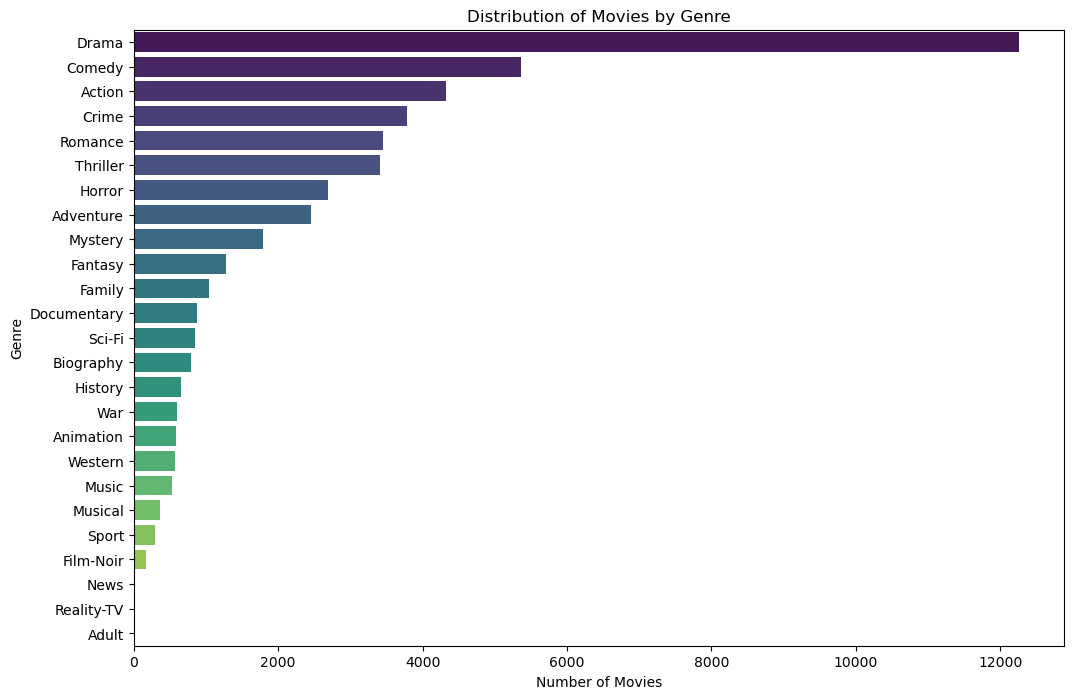

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'imdb_movies_modified_version.csv'
df = pd.read_csv(file_path)

# Select relevant columns
df = df[['Title', 'Genre', 'Description']]

# Ensure genres are properly formatted (e.g., split combined genres)
df['Genre'] = df['Genre'].str.split(', ')

# Create a new DataFrame with each genre in a separate row
genre_df = df.explode('Genre')

# Count the occurrences of each genre
genre_counts = genre_df['Genre'].value_counts()

# Plot the genre distribution using a different visualization approach
plt.figure(figsize=(12, 8))
sns.countplot(y=genre_df['Genre'], order=genre_counts.index, palette='viridis')
plt.title('Distribution of Movies by Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


In [44]:
# Recommendation System
# This function generates movie recommendations based on genres.
def recommend_movies_by_genre(df, num_recommendations=5):
    # Convert lists in 'Genre' column to strings
    df['Genre'] = df['Genre'].apply(lambda x: ', '.join(x))
    
    # Extract unique genres from the DataFrame
    unique_genres = df['Genre'].unique()
    # Initialize a dictionary to store recommendations for each genre
    recommendations = {}
    # Iterate over each unique genre
    for genre in unique_genres:
        # Filter movies by the current genre and select the top 'num_recommendations' movies
        recommended_movies = df[df['Genre'].str.contains(genre, case=False)].head(num_recommendations)
        # Store the recommended movies for the current genre in the recommendations dictionary
        recommendations[genre] = recommended_movies[['Title', 'Description']]
    # Return the dictionary of recommendations
    return recommendations

# Get recommendations for all genres
# Call the recommend_movies_by_genre function to generate recommendations for each genre
all_recommendations = recommend_movies_by_genre(df)

# Display recommendations
# Iterate over the dictionary of recommendations and print the recommended movies for each genre
for genre, movies in all_recommendations.items():
    print(f"\nRecommended Movies for Genre: {genre}")
    print(movies)



Recommended Movies for Genre: Drama
                       Title  \
0   The Shawshank Redemption   
4                         65   
5                 The Batman   
8          Blade Runner 2049   
10                     Pearl   

                                          Description  
0   Over the course of several years, two convicts...  
4   An astronaut crash lands on a mysterious plane...  
5   When a sadistic serial killer begins murdering...  
8   Young Blade Runner K's discovery of a long-bur...  
10  In 1918, a young woman on the brink of madness...  

Recommended Movies for Genre: Horror
          Title                                        Description
1     Evil Dead  Five friends head to a remote cabin, where the...
10        Pearl  In 1918, a young woman on the brink of madness...
18    Barbarian  A woman staying at an Airbnb discovers that th...
19  Knock Knock  A devoted father helps two stranded young wome...
20   Hereditary  A grieving family is haunted by tragic and d

                     Title                                        Description
425           The Fountain  As a modern-day scientist, Tommy is struggling...
496         Color of Night  A color-blind psychoanalyst is stalked by an u...
566  The Constant Gardener  A widower is determined to get to the bottom o...
622           Original Sin  A woman, along with her lover, plans to con a ...
785  Trois couleurs: Rouge  A model discovers a retired judge is keen on i...

Recommended Movies for Genre: Drama, History, Thriller
                  Title                                        Description
427         The Courier  Businessman Greville Wynne is asked by a Russi...
428   The Good Shepherd  The tumultuous early history of the Central In...
2412         Der Tunnel  During the Cold War, Germany was divided into ...
7636       Den 12. mann  They were 12 saboteurs. The Nazis killed 11 of...
8062            Wakolda  The true story of an Argentine family who live...

Recommended Movies for Ge

                        Title  \
62               Idi i smotri   
144                 Zwartboek   
948                    Sniper   
1248  Six Minutes to Midnight   
1573                 Saboteur   

                                            Description  
62    After finding an old rifle, a young boy joins ...  
144   In the Nazi-occupied Netherlands during World ...  
948   A veteran US Marine sniper is partnered with a...  
1248  UK, Aug. 15, 1939: 17 days before WWII, an Eng...  
1573  A young man accused of sabotage goes on the ru...  

Recommended Movies for Genre: Adventure, Drama, Music
                        Title  \
1587   The Rains of Ranchipur   
2901                 Seminole   
3138                    Exils   
6872           Believe in You   
11979            Daku Ramkali   

                                             Description  
1587   Despite marital problems, English Lord Albert ...  
2901   A cavalry lieutenant recounts his efforts to m...  
3138   Two French love

                        Title  \
3488              Dance Party   
19229  An Evergreen Christmas   

                                             Description  
3488   Sweety meets Sanjay and both fall in love with...  
19229  Leaving her seemingly glamorous Hollywood life...  

Recommended Movies for Genre: Comedy, Music, Musical
                             Title  \
3508  The Great American Broadcast   
4507                    Cover Girl   
5256       Broadway Melody of 1936   
5299                    Copacabana   
7442       Mein Herz ruft nach dir   

                                            Description  
3508  After WWI two men go into radio. Failure leads...  
4507  Rusty Parker wins a contest and becomes a cele...  
5256  Bob Gordon is staging a new Broadway Show. He ...  
5299  An agent has his only client pose as both a Fr...  
7442  Rosé and his opera troupe travel by ship to Mo...  

Recommended Movies for Genre: Animation
                            Title  \
9             

                                    Title  \
6216                     Jobanni no shima   
20883  Murasaki Shikibu: Genji monogatari   

                                             Description  
6216   A dramatic yet heart-warming story of cross-cu...  
20883  An animated film based on the novel by Murasak...  

Recommended Movies for Genre: Film-Noir, Horror, Mystery
         Title                                        Description
6243  Dementia  This film, with no dialogue at all, follows a ...

Recommended Movies for Genre: Horror, Thriller, Mystery
                        Title  \
6259           De dødes tjern   
12063         Murder by Phone   
14470  La casa de las sombras   

                                             Description  
6259   A group of friends travel to a cabin in the No...  
12063  A disgruntled phone company employee develops ...  
14470  Audrey investigates a murder that occured 23 y...  

Recommended Movies for Genre: Documentary, Crime
                     

                      Title                                        Description
12078  Intruder in the Dust  In 1940s Mississippi, two teenage boys and an ...

Recommended Movies for Genre: Horror, Music
                              Title  \
184   The Rocky Horror Picture Show   
771         Repo! The Genetic Opera   
2227  What's the Matter with Helen?   
3981           Phantom of the Opera   
5146                 Trick or Treat   

                                            Description  
184   A newly-engaged couple have a breakdown in an ...  
771   A worldwide epidemic encourages a biotech comp...  
2227  Two middle-aged women move to Hollywood, Calif...  
3981  An acid-scarred composer rises from the Paris ...  
5146  A bullied teenage boy is devastated after the ...  

Recommended Movies for Genre: Horror, Action
                  Title                                        Description
12220  Ren pi deng long  A psychotic craftsman pits two rival Kung-Fu m...
14956      5 Dark 

                      Title                                        Description
19708  A Frozen Christmas 3  A Frozen Christmas 3: Party Time! will delight...

Recommended Movies for Genre: Comedy, Family, Drama
                   Title Description
19874  Christmas Present  Add a Plot

Recommended Movies for Genre: Adventure, Family, Mystery
                                     Title  \
19960                    The Moon-Spinners   
20085  Suske en Wiske: De duistere diamant   

                                             Description  
19960  A teenager encounters romance, intrigue and a ...  
20085  Family adventure based on the bestselling clas...  

Recommended Movies for Genre: Musical, Family
                            Title  \
7166   Mujhe Meri Biwi Se Bachaao   
20032                     Sandman   

                                             Description  
7166   Anand Mathur comes from a middle-class backgro...  
20032  When Fantasyworld veteran, Early Knapp, decide...  

Reco